<h1>Predicting game prices</h1>
<h5 style="margin-left: 2rem">By: Elad Ben-Haim, Shalev Hadar</h5>
<br/>
<br/>

<h4>נושא המחקר</h4>
<table dir="rtl">
    <tr>
        <th>
            נושא המחקר
        </th>
        <th>
            פירוט הנושא
        </th>
    </tr>
    <tr>
        <td>
        האם ניתן לחזות מחיר של משחק בעוד x זמן?
        </td>
        <td>
        מתי הכי ישתלם לקנות את המשחק בעתיד
        </td>
    </tr>
    <tr>
        <td>
        האם ניתן לחזור מתי למוכר הכי משתלם לעשות מבצע על המשחק?
        </td>
        <td>
        מתי הכי כדאי למוכר לעשות מבצע כדי להביא עוד שחקנים ולהמשיך למכור עם הרווח הגדול ביותר
        </td>
    </tr>
</table>
<br/>

<br/>

<h4>נתוני המחקר ודרכי ניתוח</h4>
<table dir="rtl">
    <tr>
        <th>
            נתוני המחקר & דרכי ניתוח
        </th>
        <th>
             ואיך ננתח אותם
        </th>
    </tr>
    <tr>
        <td>
		פירוט הנתונים: פרטים פיננסיים הוא נמכר בזמן X ואז לחזות בכמה הוא ימכר בזמן Y ובנוסף פרטים על המשחק - כמו שם, ז'אנר פופולריות וכו'.
        </td>
        <td>
            <p style="font-size: 1.1rem">
                נשתמש ב-Crawling על אתר isThereAnyDeal(Fig.3)<br/>
                כדי לא לקבל הודעת שגיאה על שימוש יתר, נשתמש ב-PROXY כדי לא להחסם ע"י isThereAnyDeal<br/>
                ונייבא משם את כל המידע הדרוש כדי לחזות את המחיר של משחק בעוד X זמן מסוים.<br/>
                ראינו שלכל משחק קיים באיזור ה1000+ (Fig.2) רשומות של log (Fig.1) של המחיר שלו ביחס לזמן, ולחנות בה הוא נמכר ואת העלייה\ירידה במחיר של המשחק ביחד ללוג הקודם.<br/>
                בעזרת STEAM API נוציא את ז'אנר המשחק, שנת הייצור ועוד פרטים מורכבים יותר על המשחק עצמו<br/>
                ולבסוף נצרף לכל לוג את פרטי המשחק ונקבל Dataset בגודל n = כמות המשחקים, x = כמות הלוגים, כלומר n*x<br/>
                אנחנו מעוניינים כרגע לקחת את 100 המשחקים הראשונים ולפי מה שראינו כמות הלוגים בדרך כלל היא לפחות 1000 אז נקבל בסביבות ה100,000+ רשומות.<br/>
            </p>
        </td>
    </tr>
    <tr>
        <td>
		דרכי ניתוח: נשתמש בכלים שלמדנו במהלך הקורס לעבד\ללמוד מהנתונים כמה מידע שאנו צריכים למטרה זו
        </td>
        <td>
            <p style="font-size: 1.1rem">
                ננתח את הDataFrame, בעזרת טבלאות יחסי משתנים, סטטיסטיקות, ולבסוף ננסה ללמד מכונה שתחזה את התאריך של המחיר הזול ביותר בשנה מסוימת, ואת המחיר אשר יביא את כמות המכירות הגדול ביותר
            </p>
        </td>
    </tr>
</table>
<br/>
<table style="width:100%;grid-template-rows: 1fr 1fr 1fr;">
<tr>
    <td>
        <figure>
            <img src="images\log_table_for_ds3.png" alt="Is there any deal log table">
            <figcaption>Fig.1 - The main crawled data source</figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\number_of_logs_for_ds3.png" alt="Example for number of rows in a typical game">
            <figcaption>Fig.2 - Example for number of rows in a typical game (Dark souls 3) </figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\is_there_any_deal_site_example_ds3.png" alt="Is there any deal game page">
            <figcaption>Fig.3 - IsThereAnyDeal game page</figcaption>
        </figure>
    </td>
</tr>

<a id="table-of-contents"></a>
## Table-of-Content:
* [1. Imports](#1)
* [2. Global functions](#2)
* [3. Crawling + Analyzing](#3)
    * [3.1. Defining proxies for scraping](#3.1)
        * [3.1.1. Get proxy list response html website](#3.1.1)
        * [3.1.2. Scrape proxy ip addresses](#3.1.2)
        * [3.1.3. Get request using the proxies](#3.1.3)
    * [3.2. Start Scraping Sites](#3.2)
        * [3.2.1. Get list of 100 top trending games](#3.2.1)
        * [3.2.2. Finished! (Saved DataFrame to csv)](#3.2.2)
        * [3.2.3. Fix steam api raw data](#3.2.3)
        * [3.2.4. Get price history for each game + 3.2.5 get num of players at that time](#3.2.4)
* [4. Exploratory Data Analysis](#4)
    * [4.1. Most frequent shop](#4.1)
    * [4.2. Metacritic score per total steam recommendations](#4.2)
    * [4.3. Regular Price / Number of dlcs available](#4.3)
    * [4.4. Metacric score / Regular Price](#4.4)
    * [4.5. Game Price / Publisher](#4.5)
    * [4.6. Regular price / Genre](#4.6)
    * [4.7. Controller support Pie chart](#4.7)
    * [4.8. Platforms supported Pie chart](#4.8)
    * [4.9. Sales of 5 top games over time (the ones which have most history)](#4.9)
    * [4.10. Price drop of the top over a year with holidays in mind](#4.10)
* [5. Advanced Analysis and Machine Learning](#5)
    * [5.1. Feature correlation](#5.1)
    * [5.2. Linear Regression Model](#5.2)
* [External Links](#external_resources)

<a id="1"></a>
<h2>1. Imports</h2>
<a href="#table-of-contents">^back to top^</a>

In [644]:
import requests
from bs4 import BeautifulSoup
import random
import itertools
import re
import pandas as pd
from pandas import DataFrame
import time
import datetime
import os.path
import json
import ast
import dateutil.parser
from deep_translator import GoogleTranslator
import pickle
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

<a id="2"></a>
<h2>2. Global functions</h2>
<a href="#table-of-contents">^back to top^</a>

In [437]:
class list(list):
    def filter(self, fn):
        return list(filter(fn, self))
    def map(self, fn):
        return list(map(fn, self))
    def forEach(self, fn):
        for i in self.__iter__():
            fn(i)

class dict(dict):
    def getOrVal(self, key, default):
        val = self.get(key)
        if val is not None:
            return val
        return default

def save_df(df: DataFrame, file_name: str):
    df.to_csv(f'results/{file_name}')

def load_df(file_name: str):
    return pd.read_csv(f'results/{file_name}')

def get_server_response(url: str, proxy: str = None, params: list = None) -> requests.Response:
    time.sleep(1)
    if proxy is not None:
        return requests.get(url, proxies={"http": proxy, "https":proxy}, params=params)
    else:
        return requests.get(url, params=params)

def get_text_as_beautiful_soup(text: str) -> BeautifulSoup:
    return BeautifulSoup(text, 'html.parser')

def get_response_as_beautiful_soup(req: requests.Response) -> BeautifulSoup:
    return BeautifulSoup(req.text, 'html.parser')

def cache_json(folder_path: str, id: str, get_function) -> object:
    url = f'./cache/{folder_path}/{id}.json'
    if os.path.isfile(url):
        f = open(url, 'r')
        data = json.load(f)
        f.close()
    else:
        try:
            data = get_function(id).json()
            f = open(url, 'a')
            f.write(json.dumps(data))
            f.close()
        except Exception as e:
            data = dict()
    return data

def cache_soup(folder_path: str, id: str, get_function):
    url = f'./cache/{folder_path}/{id}.html'
    if os.path.isfile(url):
        f = open(url, 'r')
        soup = BeautifulSoup(f.read(), 'html.parser')
        f.close()
    else:
        res = get_function(id)
        f = open(url, 'a')
        f.write(res.text)
        f.close()
        soup = get_response_as_beautiful_soup(res)
    return soup

def translate(source: str):
    url = './cache/translations.pickle'
    translations = {
        '23/mai./2018': 'May 23, 2018',
    }
    if os.path.isfile(url):
        f = open(url, "rb")
        translations = {**translations, **pickle.load(f)}
        f.close()
    
    translation = translations.get(source)
    if translation is not None:
        return translation

    translator = GoogleTranslator(source='auto', target='en')
    print(source)
    translation = translator.translate(source)
    translations[source] = translation
    f = open( url, "wb" )
    pickle.dump(translations, f)
    f.close()
    return translation

def get_len(col):
    if callable(getattr(col, '__len__', None)):
        return len(col)
    else:
        return 0

def pluck(key):
    return lambda col: col.get(key) if type(col) is dict else None

def pluckBy(key, okFunction = lambda val: val, errFunction = lambda _: None):
    return lambda col: okFunction(col.get(key)) if type(col) is dict else errFunction(None)

def parse_datetime(datetime_str: str):
    if datetime_str == '': return
    try:
        return dateutil.parser.parse(datetime_str)
    except:
        print(datetime_str, 'start')
        translation = translate(datetime_str)
        print(datetime_str, 'ok')
        print()
        return dateutil.parser.parse(translation)

def truncate(text: str, max_num_of_letters: int):
    if len(text) > max_num_of_letters:
        return f'{text[:max_num_of_letters]}...'
    else:
        return text



<br/>

<a id="3"></a>
<h2>3. Crawling + Analyzing</h2>
<a href="#table-of-contents">^back to top^</a>

<a id="3.1"></a>
<h4>3.1. Defining proxies for scraping</h4>

<a id="3.1.1"></a>
<h5>3.1.1. Get proxy list response html website</h5>
<h6>get the html as response object instead of getting the html again and again</h6>

In [53]:
# Get the html of the proxy list website
def get_proxy_list_html() -> requests.Response:
    # Website to get free proxies
    return get_server_response('https://free-proxy-list.net/')

In [54]:
proxies_response = get_proxy_list_html()

<a id="3.1.2"></a>
<h5>3.1.2. Scrape proxy ip addresses</h5>
<a href="#table-of-contents">^back to top^</a>
<h6>gets the ip addresses as a list, shuffles them and returns an iterator to cycle through when making scrape requests</h6>

In [55]:
def get_proxy_list() -> itertools.cycle:
    soup = get_response_as_beautiful_soup(proxies_response)
    proxy_soup_list = soup.select('#list > div > div.table-responsive > div > table > tbody > tr')
    proxy_list = list(map(lambda i: i.select('td:nth-child(1)')[0].text + ':' + i.select('td:nth-child(2)')[0].text, proxy_soup_list))
    length = len(proxy_list)
    random.shuffle(proxy_list)
    return itertools.cycle(proxy_list), length

In [56]:
proxy_list, proxy_list_length = get_proxy_list()
current_proxy = next(proxy_list)

<a id="3.1.3"></a>
<h5>3.1.3. Get request using the proxies</h5>
<a href="#table-of-contents">^back to top^</a>

In [57]:
def get_proxied(url: str, params: list = None) -> requests.Response:
    i = 0
    while(i < proxy_list_length / 2):
        try:
            response = get_server_response(url, current_proxy, params=params)
            time.sleep(2)
            return response
        except:
            i += 1
        finally:
            current_proxy = next(proxy_list)

    raise RuntimeError('Half of the proxies provided don`t work.')

<br/>

<a id="3.2"></a>
<h4>3.2. Start Scraping Sites</h4>
<a href="#table-of-contents">^back to top^</a>
<h6>Steps:</h6>
<ol>
<li>Scrape and Crawl list of top 100 trending games</li>
<li>For each game:</li>
<ol>
    <li>
        get the game details from steam API using "appId" scraped either from PC Gaming Wiki or Steam Ladder links
        <ol>
            <li>Get raw data</li>
            <li>Fix and map data relevant</li>
        </ol>
    </li>
    <li>Get entire price history from isThereAnyDeal</li>
    <li>Get Number of players at that date</li>
<ol>
</ol>

In [76]:
is_there_any_deal_url = 'https://isthereanydeal.com'
steam_api_url = 'https://store.steampowered.com/api/appdetails'
steam_charts_player_count_over_time_api = lambda steam_id: f' https://steamcharts.com/app/{steam_id}/chart-data.json'

<a id="3.2.1"></a>
<h5>3.2.1. Get list of 100 top trending games</h5>
<a href="#table-of-contents">^back to top^</a>

In [642]:
def get_is_there_any_deal_games_body(n_scroll: int) -> str:
    html = ""
    driver = webdriver.Chrome(executable_path=r'.\geckodriver\geckodriver.exe')
    actions = ActionChains(driver)
    try:
        driver.get(is_there_any_deal_url)
        for i in range(0, n_scroll):
            try:
                time.sleep(1)
                WebDriverWait(driver, timeout=10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div#lazyload"))
                )
                element = driver.find_element_by_id("lazyload")
                actions.move_to_element(element).perform()
            except Exception as e:
                print(i, e)
        body = driver.find_element(By.CSS_SELECTOR, "body")
        html = body.get_attribute('innerHTML')
    finally:
        driver.quit()
    return html

def get_is_there_any_deal_games_response(n_scroll: int) -> requests.Response:
    return get_server_response(is_there_any_deal_url)

In [158]:
is_there_any_deal_games_text = get_is_there_any_deal_games_body(10)
print(is_there_any_deal_games_text)

C:\Users\elad1\AppData\Local\Temp/ipykernel_17812/1279131902.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'.\geckodriver\geckodriver.exe')
C:\Users\elad1\AppData\Local\Temp/ipykernel_17812/1279131902.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("lazyload")




    <a href="https://new.isthereanydeal.com/" title="Try new IsThereAnyDeal alpha" style="color:white;display: flex;align-items: center;position: fixed;bottom: 20px;left: 50%;margin-left: 500px;z-index:9999;">
        <img src="/images/v2/logo.svg" alt="New logo" style="height: 30px;margin-right: 0.5em;">
    </a>

            <div id="ledgeContainer">
            <div id="ledge">
                <ul class="dropdown">
                    <li class="drop">
                        <i class="fa fa-globe fa-lg"></i>
                        <strong>
                            US                        </strong>
                        <ul class="drop__region">
                            <li><a href="?country=AU">AU</a></li>
                            <li><a href="?country=BR">BR</a></li>
                            <li><a href="?country=CA">CA</a></li>
                            <li><a href="?country=CN">CN</a></li>
                            <li><a href="?country=FR">EU1</a></li>
  

In [159]:
def add_game_to_dataframe(df: DataFrame, game: dict) -> DataFrame:
    return df.append(DataFrame([game]), ignore_index=True)

In [160]:
def get_steam_api_game_response(steamId: str) -> requests.Response:
    return get_server_response(steam_api_url, params={'appids': steamId})

In [161]:
def get_steam_charts_player_count(steamId: str) -> requests.Response:
    return get_server_response(steam_charts_player_count_over_time_api(steamId))

In [162]:
def delete_if_exists(d: dict, *keys: list) -> dict:
    for key in keys:
        if d.get(key) is not None:
            del d[key]
    return d

In [188]:
def get_steam_api_game_details(steamId: str) -> dict:
    data = cache_json('steam_api_details', steamId, get_steam_api_game_response)
    if data.get(steamId) is None or data.get(steamId).get('data') is None:
        return {}
    data = data[steamId]['data']

    if data.get('categories') is not None: # GAME ,,,,, [{id:3, name: ACTION}, {id:5, name:ROUGE_LIKE}]
        for category in data['categories']:
            data['category.'+translate(str(category['description']))]=True
        del data['categories']
    
    if data.get('genres') is not None:
        for genre in data['genres']:
            data['genre.'+translate(str(genre['description']))]=True
        del data['genres']

    if data.get('developers') is not None:
        data['developer'] = data['developers'][0]
        del data['developers']
    
    if data.get('publishers') is not None:
        data['publisher'] = data['publishers'][0]
        del data['publishers']
        
    if data.get('supported_languages') is not None: # <strong>*</strong>English<strong>*</strong>, Japanese, Spanish => ['English', 'Japanese', 'Spanish']
        supported_languages = data['supported_languages']\
                            .replace('<strong>*</strong>', '')\
                            .replace('<br/>', '')\
                            .replace('<br>', '')\
                            .replace('languages with full audio support', '')\
                            .split(',')
        supported_languages =filter(lambda lang: lang.lower() in ['english', 'italian', 'french', 'german', 'russian', 'chinese'], supported_languages)
        for language in supported_languages:
            data[f'supported_language.' + language.strip().replace(' ', '_')]=True
        del data['supported_languages']

    return data

<img style="width: 50%" src="images/steam_api_response.png"/>

In [189]:
def get_game_dataframe():
    soup = get_text_as_beautiful_soup(is_there_any_deal_games_text)
    df = DataFrame()
    games = soup.select("#games > div.game")
    game_dict = dict()
    for game in tqdm(games):
        steamId = game.attrs.get('data-steamid')
        if steamId is not None:
            steamId: str
            if 'app' in steamId:
                steamId = steamId.split('/')[1] # app/{steamId}
                title = game.select("div.title > a")[0].text
                history = game.select("div.overview.exp.tgl-hide > a:nth-child(5)")[0].attrs.get('href')
                game_details = get_steam_api_game_details(steamId)
                if game_details == {}: continue
                df = add_game_to_dataframe(df, {'steamId': steamId, 'title': title, 'history_link': is_there_any_deal_url + history, **game_details})
    return df

<a id="3.2.2"></a>
<h5>3.2.2. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [203]:
games_dataframe = get_game_dataframe()
save_df(games_dataframe, 'games_dataframe.csv')
games_dataframe

  0%|          | 0/1000 [00:00<?, ?it/s]

steamId                                              title  \
0    1174180                              Red Dead Redemption 2   
1     588650                                         Dead Cells   
2       3590       Plants vs. Zombies™ Game of the Year Edition   
3     361280                                            Turmoil   
4    1196590                              Resident Evil Village   
..       ...                                                ...   
782  1154840                                      Shadow Empire   
783   784080                         MechWarrior 5: Mercenaries   
784  1281610                                                Hex   
785   208580  STAR WARS®: Knights of the Old Republic™ II - ...   
786   398110                                      Reigning Cats   

                                          history_link  type  \
0    https://isthereanydeal.com/game/reddeadredempt...  game   
1    https://isthereanydeal.com/game/deadcells/hist...  game   
2    https://isthereanydeal.com/game/plantsvszombie...  game   
3     https://isthereanydeal.com/game/turmoil/history/  game   
4    https://isthereanydeal.com/game/residentevilvi...  game   
..                                                 ...   ...   
782  https://isthereanydeal.com/game/shadowempire/h...  game   
783  https://isthereanydeal.com/game/mechwarriorvme...  game   
784       https://isthereanydeal.com/game/hex/history/  game   
785  https://isthereanydeal.com/game/starwarsknight...  game   
786  https://isthereanydeal.com/game/reigningcats/h...  game   

                                                  name  steam_appid  \
0                                Red Dead Redemption 2      1174180   
1                                           Dead Cells       588650   
2                      Plants vs. Zombies GOTY Edition         3590   
3                                              Turmoil       361280   
4                                Resident Evil Village      1196590   
..                                                 ...          ...   
782                                      Shadow Empire      1154840   
783                         MechWarrior 5: Mercenaries       784080   
784                              HEX Hacking Simulator      1281610   
785  STAR WARS™ Knights of the Old Republic™ II - T...       208580   
786                                      Reigning Cats       398110   

    required_age  is_free                               detailed_description  \
0              0    False  <h1>Ultimate Edition</h1><p><img src="https://...   
1              0    False  <h1>New DLC Available</h1><p><a href="https://...   
2              0    False  <img src="https://cdn.akamai.steamstatic.com/s...   
3              0    False  <h1>CHECK OUT OUR UPCOMING GAME</h1><p><a href...   
4             18    False  Experience survival horror like never before i...   
..           ...      ...                                                ...   
782            0    False  <h1>Major Update! New Planet Classes</h1><p><i...   
783            0    False  <h1>FREE TO PLAY</h1><p><a href="https://store...   
784            0    False  Use your communication skills to bypass intern...   
785            0    False  Five years after the events from the award win...   
786            0    False  Help Kingkat to defend the castle while waitin...   

                                        about_the_game  ...  \
0    America, 1899.<br />\r\n<br />\r\nArthur Morga...  ...   
1    <img src="https://cdn.akamai.steamstatic.com/s...  ...   
2    <img src="https://cdn.akamai.steamstatic.com/s...  ...   
3    Turmoil offers players a visually charming, to...  ...   
4    Experience survival horror like never before i...  ...   
..                                                 ...  ...   
782  Shadow Empire is a deep turn-based 4X wargame ...  ...   
783  BE YOUR OWN WEAPON OF WAR<br />\r\nWelcome to ...  ...   
784  Use your communication skills to bypass inter

In [183]:
save_df(games_dataframe, "raw_games_data_with_steam_details.csv")

In [219]:
def drop_columns(df: DataFrame, columns) -> DataFrame:
    return df.drop(columns, axis=1)

def use_val(fun):
    return lambda col: (fun(ast.literal_eval(col)) if type(col) is str else fun(col))

<a id="3.2.3"></a>
<h5>3.2.3. Fix steam api raw data</h5>
<a href="#table-of-contents">^back to top^</a>

In [228]:

def map_steam_api_game_data(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    ignored_columns = [
        'type',
        'name',
        'steam_appid',
        'detailed_description',
        'about_the_game',
        'short_description',
        # 'fullgame',
        'header_image',
        'website',
        'pc_requirements',
        'mac_requirements',
        'linux_requirements',
        'legal_notice',
        'price_overview',
        'package_groups',
        'screenshots',
        'achievements',
        'background',
        'content_descriptors',
        'support_info',
        'ext_user_account_notice',
        'reviews',
        'drm_notice'
    ]
    df = drop_columns(df, ignored_columns)

    for (new_col, col) in (('number_of_demos', 'demos'), ('num_of_game_videos', 'movies'), ('num_of_dlc', 'dlc'), ('num_of_packages_game_is_in', 'packages')):
        df[new_col] = df[col].apply(use_val(get_len))
        df = drop_columns(df, col)

    df['metacritic_score'] = df['metacritic'].apply(use_val(pluckBy('score', lambda score: score / 100)))
    df = drop_columns(df, 'metacritic')

    for (new_col, col, key) in (('windows_supported', 'platforms', 'windows'), ('mac_supported', 'platforms', 'mac'), ('linux_supported', 'platforms', 'linux')):
        df[new_col] = df[col].apply(use_val(pluckBy(key, lambda val: 1 if val == True else 0, lambda _: 0)))
    df = drop_columns(df, 'platforms')
    
    df['total_steam_recommendations'] = df['recommendations'].apply(use_val(pluck('total')))
    df = drop_columns(df, 'recommendations')
    df['release_date'] = df['release_date'].apply(use_val(pluckBy('date', parse_datetime)))

    for col in filter(lambda c: len(c.split('.')) > 1,df.columns):
        df[col].fillna(False, inplace=True)
    return df

<h5 id="3.2.3">3.2.3. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [229]:
games_joined_with_steam_details = map_steam_api_game_data(games_dataframe)
save_df(games_joined_with_steam_details, 'games_details_data.csv')

23/mai./2018 start
23/mai./2018 ok

3 июн. 2020 start
3 июн. 2020 ok

17/mai./2021 start
17/mai./2021 ok

2015年11月9日 start
2015年11月9日 ok

2016年10月20日 start
2016年10月20日 ok

19 янв. 2016 start
19 янв. 2016 ok

2015年4月27日 start
2015年4月27日 ok

13 фев. 2018 start
13 фев. 2018 ok

8 мая. 2018 start
8 мая. 2018 ok

2012年10月25日 start
2012年10月25日 ok



<a id="3.2.4"></a>
<h5>3.2.4. Get price history for each game + 3.2.5 get num of players at that time</h5>
<a href="#table-of-contents">^back to top^</a>

In [230]:
pounds_to_usd_conversion_rate = 1.34

In [231]:
def convert_to_usd(price: str) -> float:
    parsed_price = float(re.sub('\$|\£|\s','',price).strip().lstrip())
    
    if ('£' in price):
        parsed_price = parsed_price * pounds_to_usd_conversion_rate

    return parsed_price

In [232]:
def get_game_history_details(steamId: str, history_link: str) -> DataFrame:
    soup = cache_soup('games', steamId, lambda x: get_server_response(history_link))
    player_count = cache_json('steam_charts_player_count', steamId, get_steam_charts_player_count)
    df = DataFrame()
    vals = soup.select("div.lg2.game")
    for val in vals:
        dateText = val.select_one("span.lg2__time-rel").attrs['title']
        date = datetime.datetime.strptime(dateText, '%a, %d %b %Y %H:%M:%S +0000')
        current_player_count = min(player_count, key=lambda x: abs(datetime.datetime.fromtimestamp(x[0] / 1000)-date))[1]
        shop_title = val.select_one('.shopTitle').text.strip()
        regular_price_text = val.select_one('div:nth-child(2) > span.lg2__price').text
        price_now_text = val.select_one('div:nth-child(3) > span.lg2__price').text
        regular_price = convert_to_usd(regular_price_text)
        price_now = convert_to_usd(price_now_text)
        if (regular_price != 0):
            price_change_percentage = price_now / regular_price
        else:
            price_change_percentage = 0
        df = df.append(DataFrame([{'record_date': date, 'player_count': current_player_count, 'shop': shop_title, 'regular_price': regular_price, 'price_now': price_now, 'price_change': price_change_percentage}]))
    return df


In [233]:
def get_games_with_history():
    games_with_history = DataFrame()
    l = list(games_joined_with_steam_details.iterrows())
    for index, row in tqdm(l, total=len(games_joined_with_steam_details.index)):
        try:
            row_df = DataFrame([row])
            game_history_details = get_game_history_details(row['steamId'], row['history_link'])

            game_history_details['key'] = 1
            row_df['key'] = 1

            cross = row_df.merge(game_history_details, how = 'outer')
            games_with_history = games_with_history.append(cross)
        except Exception as e:
            print(f'Exception at index: {index}', e)
    
    games_with_history.dropna(subset=['shop', 'regular_price'], inplace=True)
    return games_with_history

In [234]:
games_with_history = get_games_with_history()

  0%|          | 0/787 [00:00<?, ?it/s]

Exception at index: 154 min() arg is an empty sequence
Exception at index: 185 min() arg is an empty sequence
Exception at index: 201 min() arg is an empty sequence
Exception at index: 263 min() arg is an empty sequence
Exception at index: 264 min() arg is an empty sequence
Exception at index: 312 'charmap' codec can't encode characters in position 325-327: character maps to <undefined>
Exception at index: 334 min() arg is an empty sequence
Exception at index: 388 min() arg is an empty sequence
Exception at index: 457 min() arg is an empty sequence
Exception at index: 465 min() arg is an empty sequence
Exception at index: 484 min() arg is an empty sequence
Exception at index: 487 min() arg is an empty sequence
Exception at index: 530 min() arg is an empty sequence
Exception at index: 547 min() arg is an empty sequence
Exception at index: 551 min() arg is an empty sequence
Exception at index: 561 min() arg is an empty sequence
Exception at index: 576 min() arg is an empty sequence
Excep

In [235]:
def clean_game_history_details(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    if (df.get('shop') is not None):
        df.drop(df[df['shop']=='voidu'].index, inplace=True)
        df.drop(df[df['shop']=='Voidu'].index, inplace=True)
    if (df.get('regular_price') is not None):
        df.drop(df[df['regular_price'] == 0].index, inplace=True)

    df['controller_support'].fillna('no', inplace=True)
    df.drop(['key'], axis=1, inplace=True)
    return df

In [236]:
cleaned_games_with_history = clean_game_history_details(games_with_history)

<h3>(3) Crawling + Fixing Finished! (Saved DataFrame to csv)</h3>
<a href="#table-of-contents">^back to top^</a>

In [237]:
save_df(cleaned_games_with_history, 'games_with_history.csv')

In [238]:
cleaned_games_with_history = load_df('games_with_history.csv')
cleaned_games_with_history = cleaned_games_with_history.loc[:, ~cleaned_games_with_history.columns.str.contains('^Unnamed')]

<a id="4"></a>
<h2>4. Exploratory Data Analysis</h2>
<a href="#table-of-contents">^back to top^</a>

In [657]:
pie_chart_size = 10
default_plot_title_size = 24

default_pie_label_size = 15
default_2d_label_size = 20

class pie_plot_options:
    def __init__(self,
                 title='',
                 title_size=default_plot_title_size,
                 label_size=default_pie_label_size,
                 y_label=None,
                 sq_size=None,
                 num_of_charts=None,
                 is_percentage=True
                 ):
        self.title = title
        self.title_size = title_size
        self.label_size = label_size
        self.sq_size = sq_size
        self.num_of_charts = num_of_charts
        self.is_percentage = is_percentage
        self.y_label=y_label

class plot_2d_options:
    def __init__(self,
                 title='',
                 title_size=default_plot_title_size,
                 label_size=default_2d_label_size,
                 x_label_rotation=None,
                 y_label_rotation=None,
                 xlabel=None,
                 ylabel=None,
                 x_size=None,
                 y_size=None,
                 sq_size=None
                ):
        self.title = title
        self.title_size = title_size
        self.label_size = label_size
        self.x_label_rotation = x_label_rotation
        self.y_label_rotation = y_label_rotation
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.x_size = x_size
        self.y_size = y_size
        self.sq_size = sq_size

<h5>Functions</h5>

In [687]:
def get_frequent_elements(df: DataFrame, col_name: str, num_top_elements: int) -> pd.Series:
    return pd.Series(df[col_name].value_counts()[:num_top_elements].sort_index())

def one_dim_plot(sr: pd.Series, plot_type: str, axis: int = None, plot_style: pie_plot_options = None):
    options = dict()
    options['kind'] = plot_type
    options['pctdistance']=1.2
    options['labeldistance']=1.4
    if axis:
        options['ax'] = axis

    if plot_style.is_percentage:
        options['autopct']='%1.0f%%'

    if plot_style.title:
        options['title']=plot_style.title

    if plot_style.label_size:
        options['fontsize']=plot_style.label_size

    return sr.plot(**options)

def plot_scatter(df: DataFrame, x: str, y: str):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)

def set_pie_plot_styling(plot=None, settings: pie_plot_options = None):
    if settings is None: return
    if settings.title_size:
        plt.rcParams['figure.titlesize'] = settings.title_size

    if plot:
        if settings.title:
            plt.pyplot.title(settings.title, pad=settings.title_size, fontsize=settings.title_size)

    if settings.sq_size and settings.num_of_charts:
        plt.rcParams['figure.figsize'] = (settings.sq_size*settings.num_of_charts, settings.sq_size)
    elif settings.sq_size:
        plt.rcParams['figure.figsize'] = (settings.sq_size, settings.sq_size)

    if settings.y_label:
        plot.set_ylabel(settings.y_label, labelpad=settings.label_size, fontsize=settings.label_size)

def set_plot_styling(plot, settings: plot_2d_options = None):
    if settings is None: return
    if settings.sq_size:
        plt.rcParams['figure.figsize'] = (settings.sq_size, settings.sq_size)

    if settings.x_size and plt.rcParams['figure.fixsize']:
        plt.rcParams['figure.fixsize'][0] = settings.x_size

    if settings.y_size and plt.rcParams['figure.fixsize']:
        plt.rcParams['figure.fixsize'][1] = settings.y_size

    if settings.title:
        plot.set_title(settings.title, pad=settings.title_size, fontsize=settings.title_size)

    if settings.x_label_rotation:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

    if settings.y_label_rotation:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

    if settings.xlabel:
        plot.set_xlabel(settings.xlabel, labelpad=settings.label_size, fontsize=settings.label_size)

    if settings.ylabel:
        plot.set_ylabel(settings.ylabel, labelpad=settings.label_size, fontsize=settings.label_size)

def plot_violin(df: DataFrame, options: dict, plot_style: plot_2d_options):
    plot = sns.violinplot(data=df, cut=0, **options)
    set_plot_styling(plot, plot_style)

def plot_line(df: DataFrame, x: str, y: str):
    df.plot.line(x=x, y=y)

def plot_frequency(df: DataFrame, col: str, axis = None, plot_style: pie_plot_options = None):
    elm = get_frequent_elements(df, col, 5)
    if plot_style.num_of_charts:
        plt.rcParams['figure.figsize'] = (pie_chart_size*plot_style.num_of_charts, pie_chart_size)
    if axis:
        plot = one_dim_plot(elm, 'pie', axis, plot_style=plot_style)
        set_pie_plot_styling(axis, plot_style)
    else:
        plot = one_dim_plot(elm, 'pie', plot_style=plot_style)
        set_pie_plot_styling(plot, plot_style)
    return plot

def plot_bar_chart(df: DataFrame, sizeX: int = None, sizeY: int = None):
    if sizeX and sizeY:
        plt.rcParams['figure.figsize'] = (sizeX, sizeY)
    df.plot.bar(rot=0)

def plot_pie_remove_duplicates(df: DataFrame, key: str, axis=None, plot_style: pie_plot_options = None):
    plot_df = df.copy()
    # we need to drop the repeating games (because we want the real average)
    plot_df.drop_duplicates(subset=['steamId'], inplace=True)
    plot_frequency(plot_df, key, axis=axis, plot_style=plot_style)

def plot_group_by_x(ndf: DataFrame, x: str, y: str, plot_style: plot_2d_options):
    df = ndf[[x,y]].copy().dropna()
    plt.rcParams['figure.figsize'] = (10,10)
    min_x = round(df[x].min(), 2)
    max_x = round(df[x].max(), 2)
    group1_max = round((max_x-min_x)/3 + min_x, 2)
    group2_max = round((max_x-min_x)*2/3 + min_x, 2)
    group1_str = f'{min_x} to {group1_max}'
    group2_str = f'{group1_max} to {group2_max}'
    group3_str = f'{group2_max} to {max_x}'

    is_between = lambda x_in, min_in, max_in: min_in < x_in < max_in
    df[x] = df[x].apply(lambda row:\
                            group1_str if row < group1_max else\
                            group2_str if is_between(row, group1_max, group2_max) else\
                            group3_str)
    plot_violin(df, {
        'x': x,
        'y': y,
        'order': [group1_str, group2_str, group3_str]
    }, plot_style)

def plot_group_by_x_percentage(ndf: DataFrame, x: str, y: str, plot_style: plot_2d_options):
    df = ndf.copy()
    df[x] = df[x] * 100
    plot_group_by_x(df, x, y, plot_style)

def plot_game_support(ndf: DataFrame):
    df = ndf.copy()
    df['windows_supported'] = df['windows_supported']==1
    df['mac_supported'] = df['mac_supported']==1
    df['linux_supported'] = df['linux_supported']==1
    fig, (ax1, ax2, ax3) = plt.pyplot.subplots(1, 3)
    fig.suptitle('Platforms supported')
    fig.set_size_inches(pie_chart_size*3, pie_chart_size)
    plt.pyplot.rcParams['axes.titlesize']=default_plot_title_size

    plot_pie_remove_duplicates(df, 'windows_supported', ax1, plot_style=pie_plot_options(
        title="Is Windows Supported",
        num_of_charts=3,
        y_label=' '
    ))
    plot_pie_remove_duplicates(df, 'mac_supported', ax2, plot_style=pie_plot_options(
        title="Is Mac Supported",
        num_of_charts=3,
        y_label=' '
    ))
    plot_pie_remove_duplicates(df, 'linux_supported', ax3, plot_style=pie_plot_options(
        title="Is Linux Supported",
        num_of_charts=3,
        y_label=' '
    ))

def plot_game_price_history(ndf: DataFrame, steam_id: int, game_title: str, year: int = None, show_holidays = False):
    df = ndf.copy().filter(['steamId', 'record_date', 'price_change'], axis=1)
    df['price_change'] = 1 - df['price_change']
    df = df[df['steamId'] == steam_id]
    df['record_date'] = pd.to_datetime(df['record_date'], format='%Y-%m-%d %H:%M:%S')
    df = df[df['record_date'].notna()]
    if year is not None:
        from_date = datetime.datetime(year, 1, 1)
        to_date = datetime.datetime(year+1, 1, 1)
        df = df[df['record_date'] > from_date]
        df = df[df['record_date'] < to_date]
    df.drop('steamId', axis=1, inplace=True)
    df = df.set_index('record_date')
    least_date: datetime.datetime = df.index.min()
    most_date: datetime.datetime = df.index.max()
    holidays = [('Christmas', 12, 25),\
                ('Black Friday', 11, 25),\
                ('Chinese Single\'s Day', 11, 11),\
                ('Steam Summer Sale', 10, 1)]

    df.plot(title=(f'{game_title}, year {year}' if year is not None else game_title)) # Shadow of the tomb raider, year 2017
    if show_holidays:
        for (holiday, month, day) in holidays:
            for i in range (least_date.year, most_date.year + 1):
                pyplot.axvline(x=datetime.datetime(i, month, day),color='m', linestyle="--")
                pyplot.text(datetime.datetime(i, month, day),0,holiday,rotation=90)


def get_n_games_row_count(df: DataFrame, n: int) -> list:
    games = dict(df['steamId'].value_counts().sort_values(ascending=False)[:n])
    games_list = list()
    for (steam_id, count) in games.items():
        games_list.append((steam_id, df[df['steamId']==steam_id].iloc[0]['title'], count))
    return games_list

def plot_regular_price_per_genre(ndf: DataFrame):
    df = ndf.copy()
    genre_colums = list(df.columns).filter(lambda x: str(x).startswith('genre.'))
    genre_averages = dict()
    for genre_colum in genre_colums:
        genre_averages[genre_colum] = ndf[ndf[genre_colum] == True]['regular_price'].mean() # Average regular price for all rows matching the genre
    averages = list(genre_averages.items())
    averages = sorted(averages, key=lambda k: k[1], reverse=True)
    keys = list(map(lambda item: truncate(item[0].split('.')[1], 10), averages))
    values = list(map(lambda item: item[1], averages))
    plot_bar_chart(DataFrame(values, keys), sizeX=30, sizeY=5)

# Plot out top 5 publishers
# drop duplicate games by steamId
# group by publisher
# select row from publisher
# present as bar graph
def plot_price_per_10_random_publishers(ndf: DataFrame):
    df = ndf[['steamId', 'publisher', 'regular_price']].copy()
    df.drop_duplicates(subset=['steamId'], inplace=True)
    df['publisher'] = df['publisher'].astype('category')
    df_grouped_by_publisher = df.groupby(['publisher'])
    grouped_by_publisher_list = list(df_grouped_by_publisher)
    random.shuffle(grouped_by_publisher_list)

    plot_df = DataFrame()
    for idx, (publisher, dataframe) in enumerate(grouped_by_publisher_list):
        if idx >= 10:
            break
        plot_df = plot_df.append([dataframe])

    plot_df['publisher'].cat.remove_unused_categories(inplace=True)

    plot_violin(plot_df, {
        'x': 'publisher',
        'y': 'regular_price'
    }, plot_2d_options(
        title='Game Price / Publisher',
        x_label_rotation=90,
        xlabel='Publisher',
        ylabel='Regular Price'
    ))

<a id="4.1"></a>
<h3>4.1. Most frequent shop</h3>
<a href="#table-of-contents">^back to top^</a>
<h4>This pie shows the market share for each shop (With regard to the amount of games sold)</h4>
<h4><i>Outcome:</i> We see that unlike we expected, there is a shop larger than steam, which is GamesPlanet DE.<br/>
in addition to that steam has only 4 percent more market share then GamesPlanet FR and Fanatical</h4>

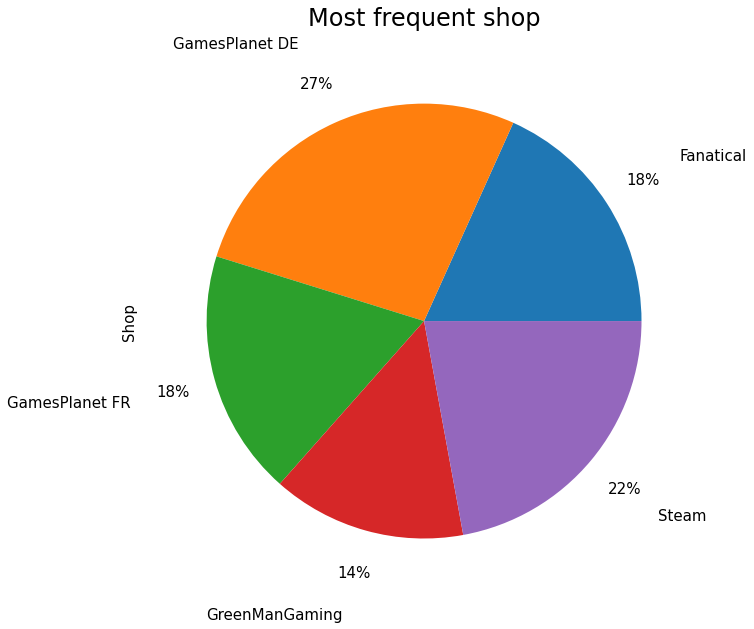

In [659]:
plot_pie_remove_duplicates(df=cleaned_games_with_history, key='shop', plot_style=pie_plot_options(
    title='Most frequent shop',
    y_label="Shop"
))

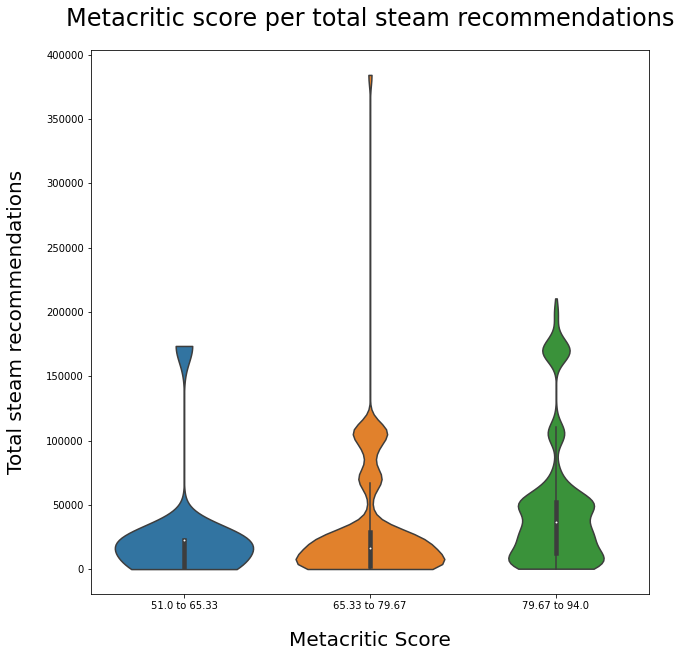

In [599]:
plot_group_by_x_percentage(
    cleaned_games_with_history,
    'metacritic_score',
    'total_steam_recommendations',
    plot_2d_options(
        title='Metacritic score per total steam recommendations',
        xlabel='Metacritic Score',
        ylabel='Total steam recommendations'
    )
)

<a id="4.3"></a>
<h3>4.3. Regular Price / Number of dlcs available</h3>
<a href="#table-of-contents">^back to top^</a>
<h4>This graph represents the connection between the regular price and the number of dlcs the game has.</h4>
<h4><i>Outcome: </i>We can see clearly that to put it simply, the cheaper the game was more dlcs it has</h4>

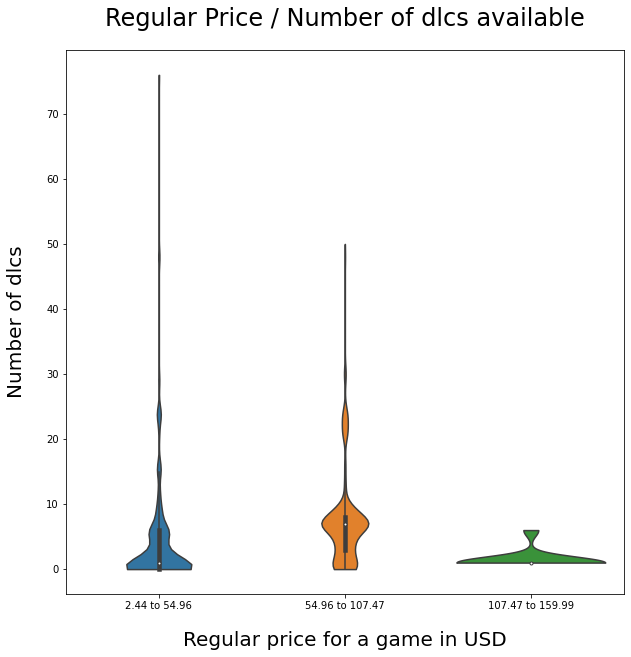

In [600]:
plot_group_by_x(
    cleaned_games_with_history,
    'regular_price',
    'num_of_dlc',
    plot_2d_options(
        title='Regular Price / Number of dlcs available',
        xlabel='Regular price for a game in USD',
        ylabel='Number of dlcs',
    )
)

<a id="4.4"></a>
<h3>4.4. Metacric score / Regular Price</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the regular price is often lined to the metacritic score the game got.</p>

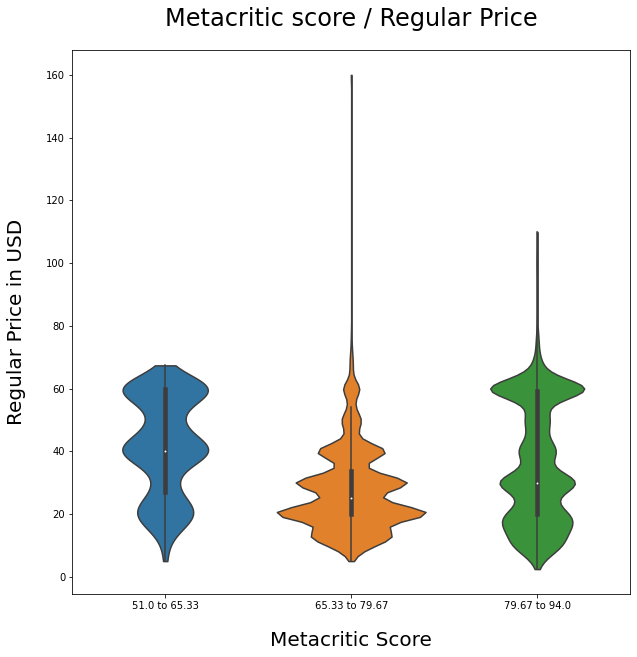

In [601]:
plot_group_by_x_percentage(
    cleaned_games_with_history,
    'metacritic_score',
    'regular_price',
    plot_2d_options(
        title='Metacritic score / Regular Price',
        ylabel='Regular Price in USD',
        xlabel='Metacritic Score',
    )
)

<a id="4.5"></a>
<h3>4.5. Game Price / Publisher</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the most expensive publishers are big companys</p>

D:\Studies\Introduction-To-Data-Science\DataScienceFinalProject\.venv\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


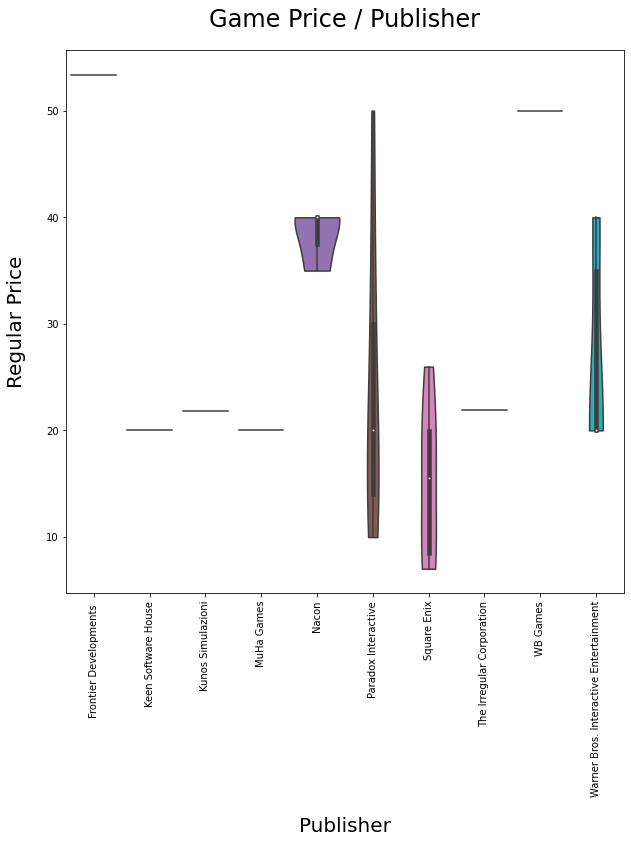

In [602]:
plot_price_per_10_random_publishers(cleaned_games_with_history)

<a id="4.6"></a>
<h3>4.6. Regular price / Genre</h3>
<a href="#table-of-contents">^back to top^</a>
<p>
We can see that the genres Action, adventure and RPG average cost is higher <br/>
probably because the development takes far more time for these genres
</p>

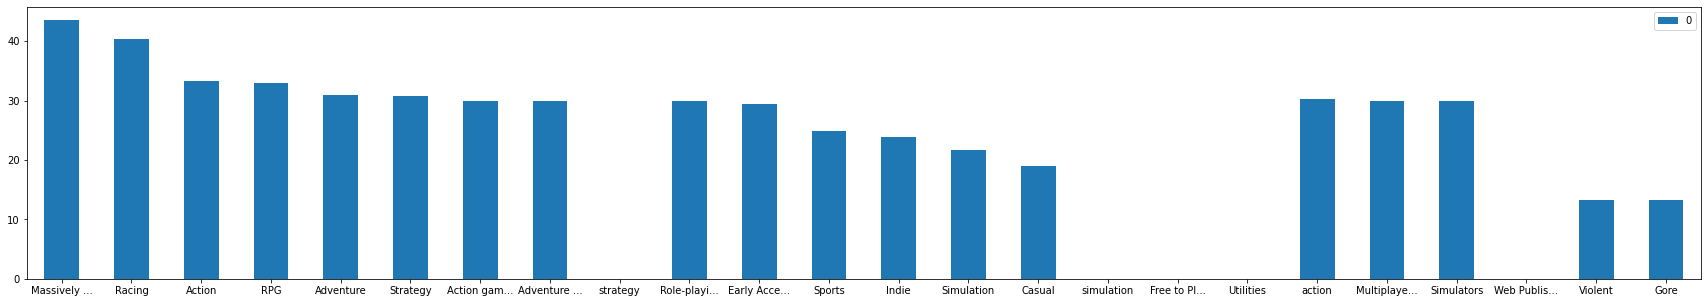

In [603]:
plot_regular_price_per_genre(cleaned_games_with_history)

<a id="4.7"></a>
<h3>4.7. Controller support Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>

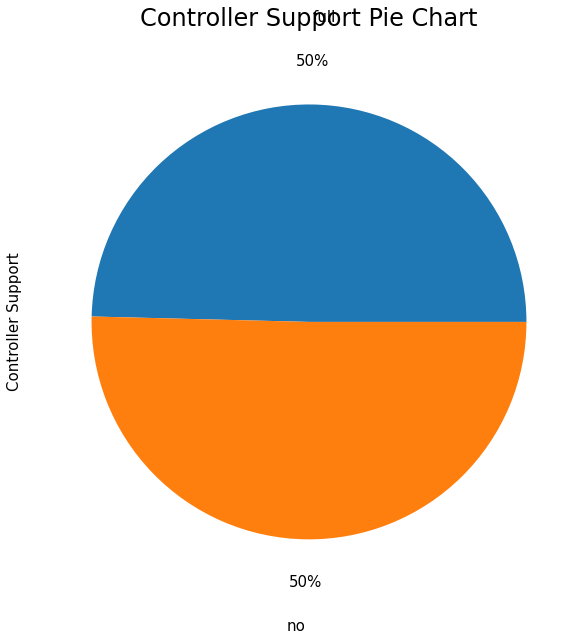

In [661]:
plot_pie_remove_duplicates(cleaned_games_with_history, 'controller_support', plot_style=pie_plot_options(
    title='Controller Support Pie Chart',
    y_label="Controller Support"
))

<a id="4.8"></a>
<h3>4.8. Platforms supported Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that probably platforms that support Mac also support Linux, and all games support Windows</p>

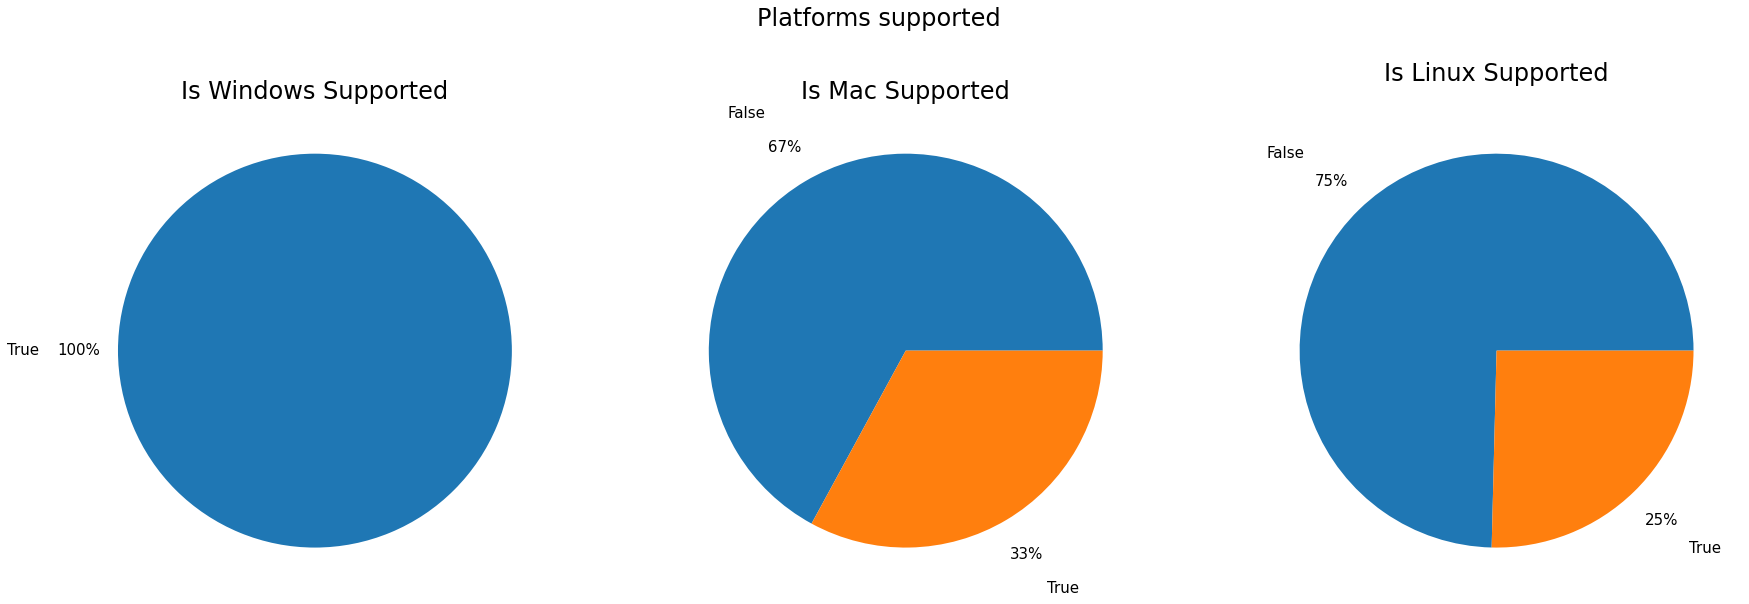

In [668]:
plot_game_support(cleaned_games_with_history)

<a id="4.9"></a>
<h3>4.9. Sales of 5 top games over time (the ones which have most history)</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that most games start giving discounts of more than 20% after the first year of release,<br/>
then reach 50% on the start of the next year and on the third and fourth reach a max of 80% discount</p>

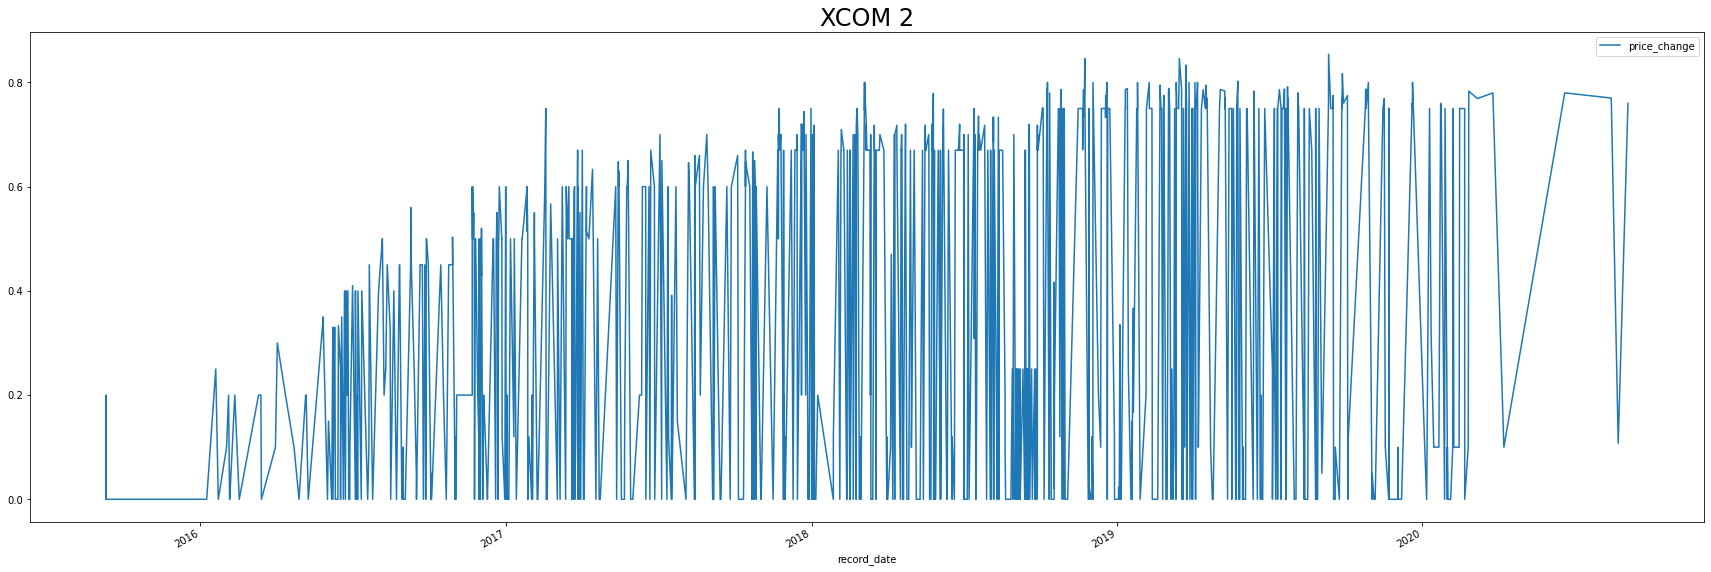

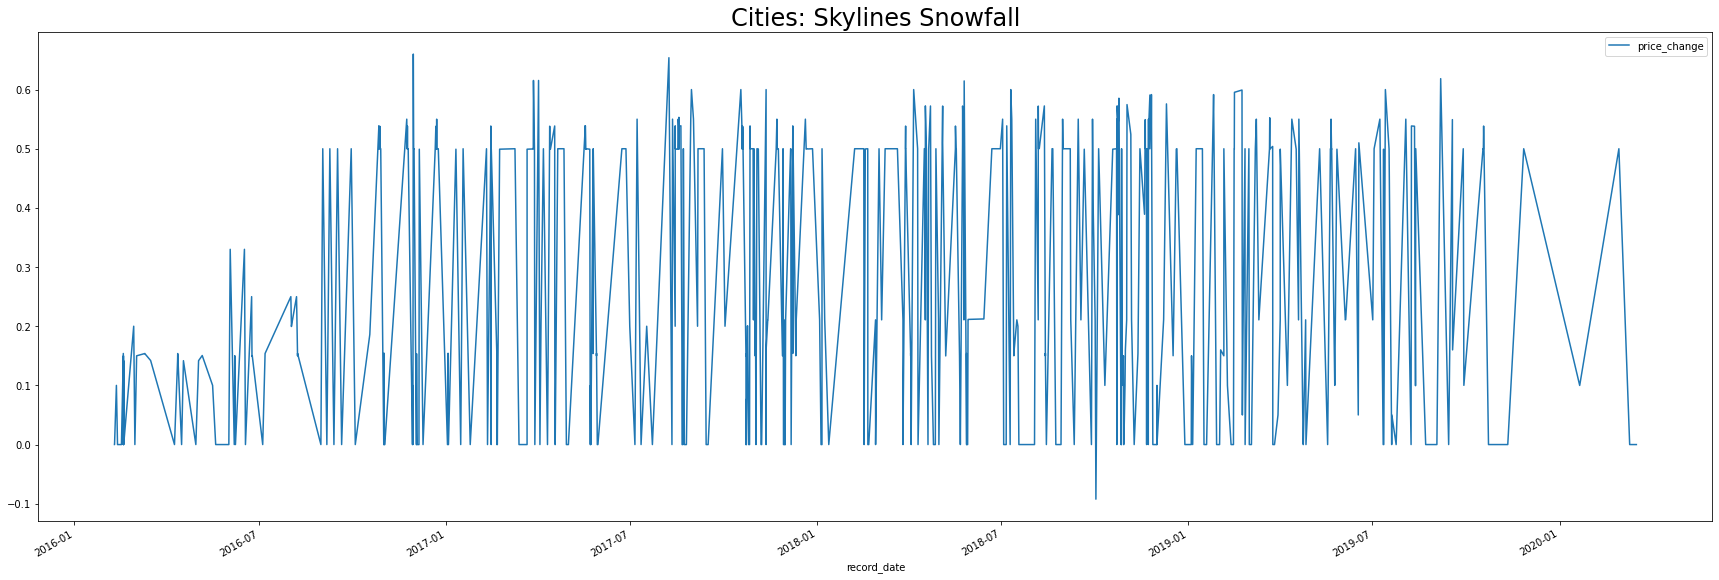

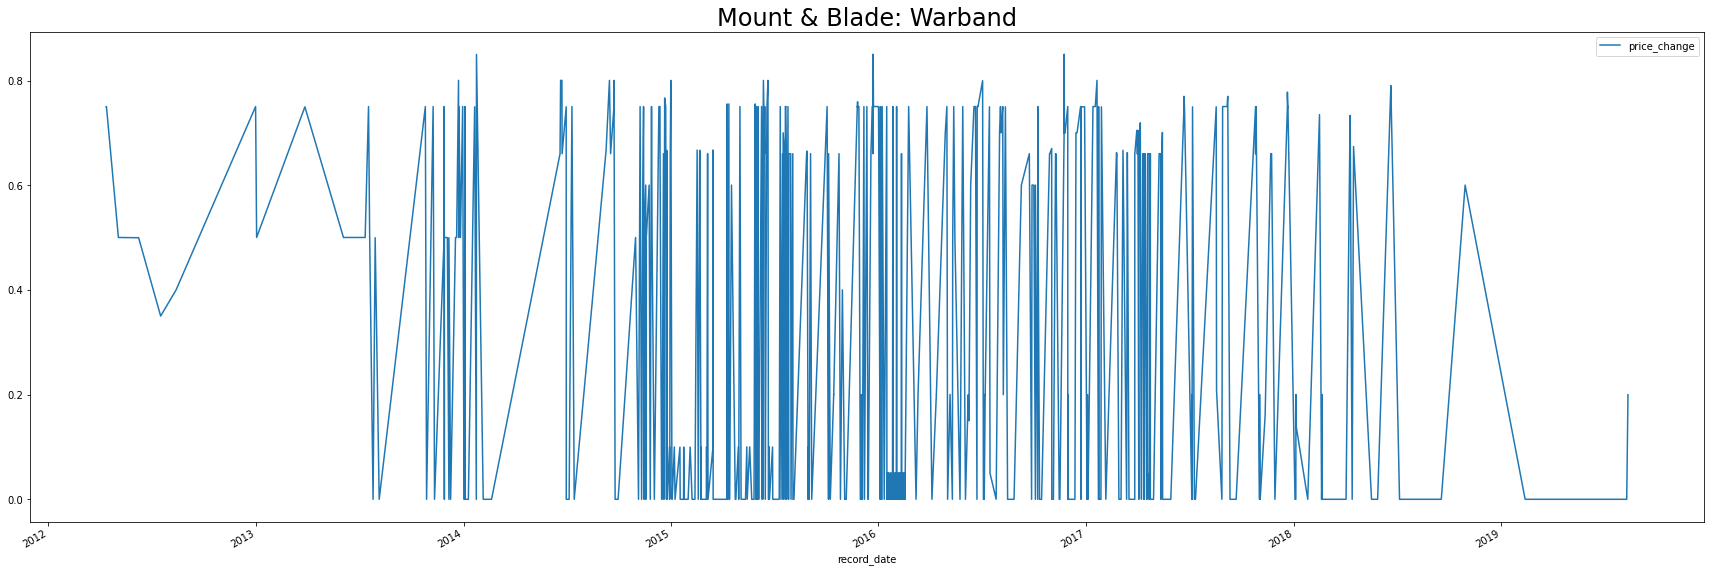

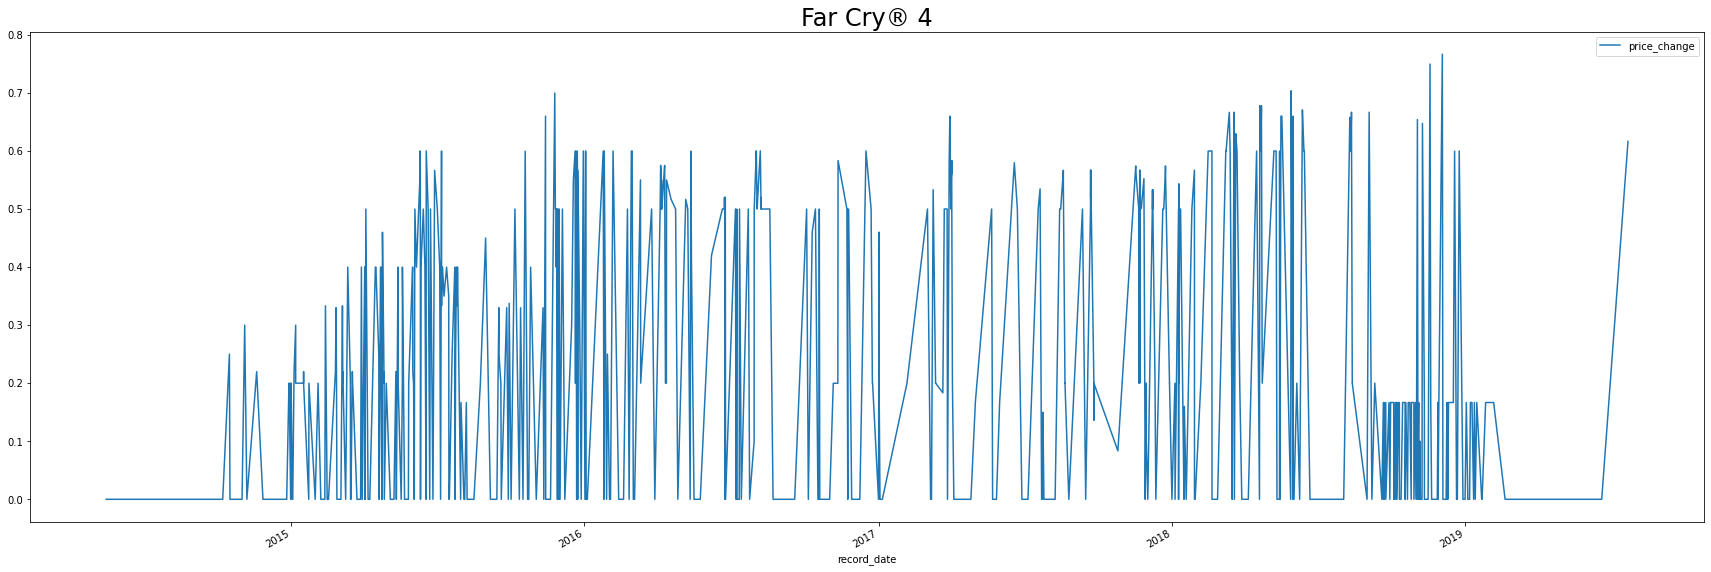

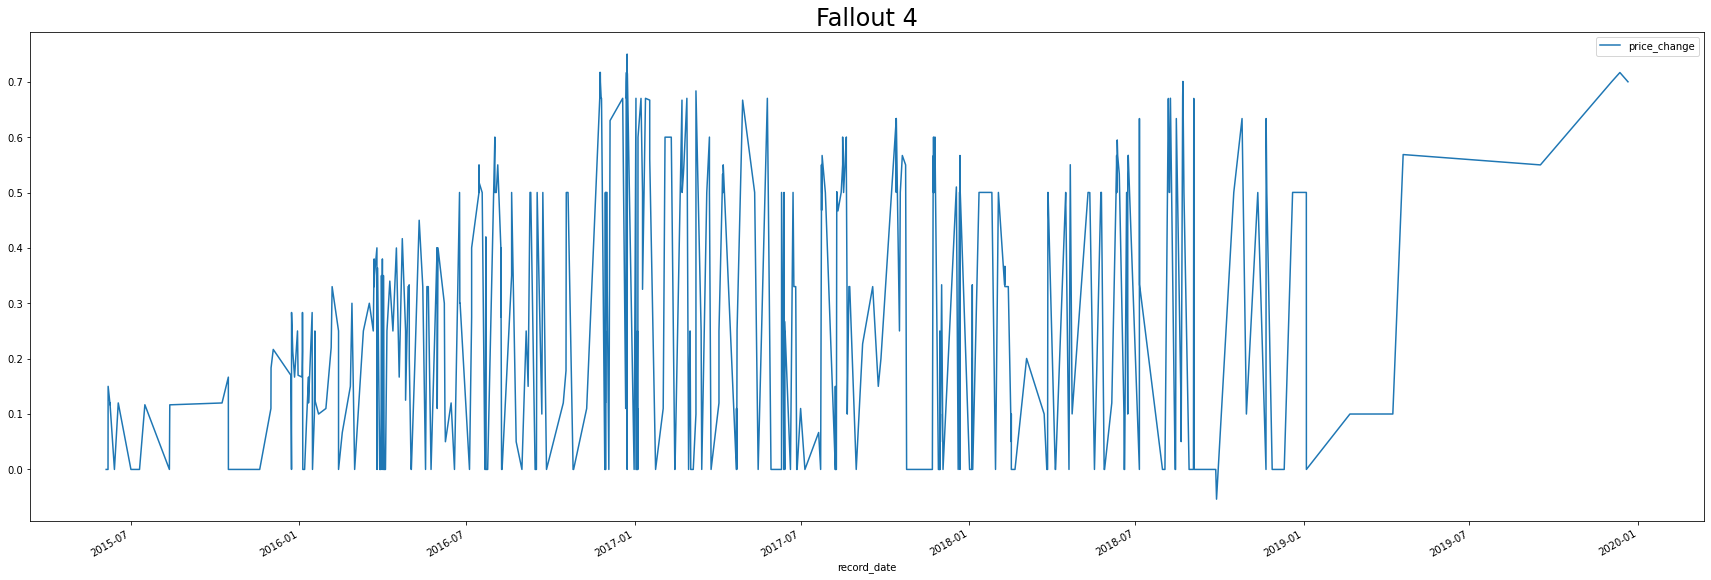

In [669]:
games = get_n_games_row_count(cleaned_games_with_history, 5)
for (steam_id, game_title, _) in games:
    plot_game_price_history(cleaned_games_with_history, steam_id, game_title=game_title)

<a id="4.10"></a>
<h3>4.10. Price drop of the top over a year with holidays in mind</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We also see that on holidays the prices of games drop substantially,<br/>
but like in the last Plot after the second year, the time of year is not a factor anymore
</p>

  0%|          | 0/1 [00:00<?, ?it/s]

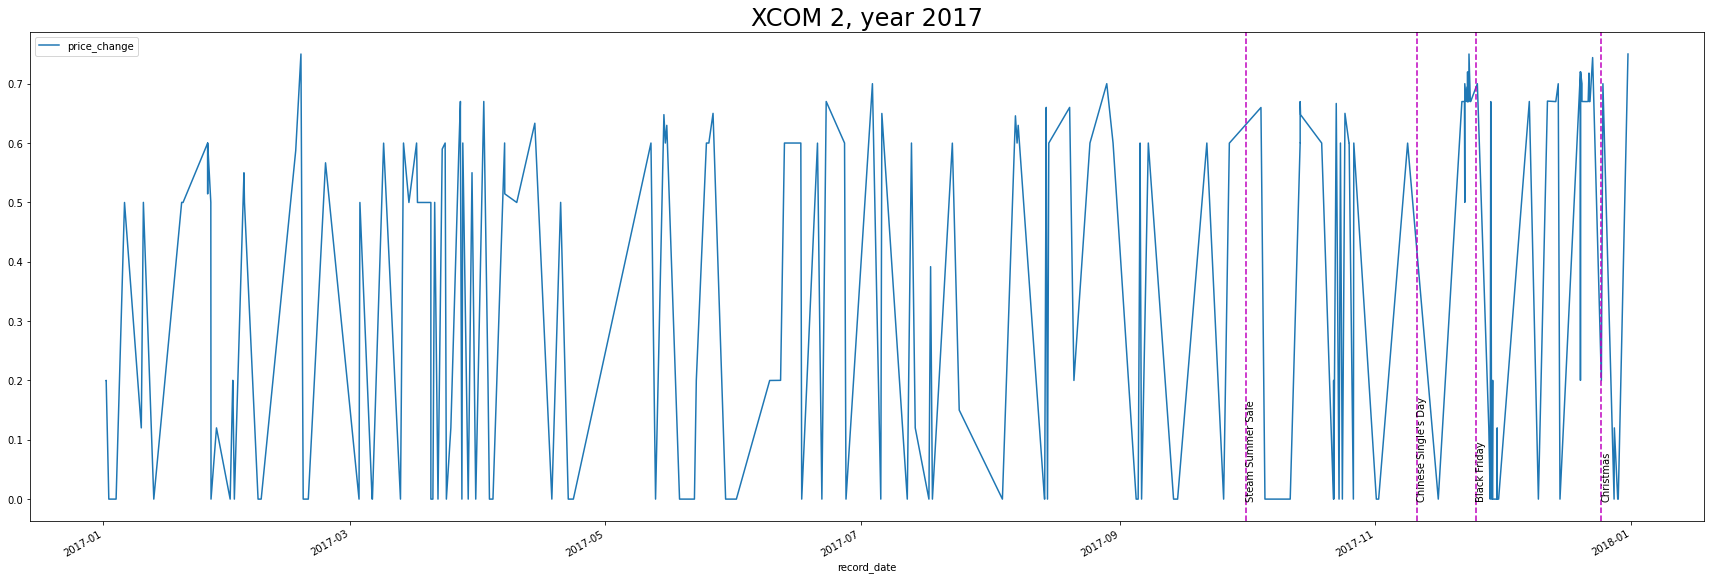

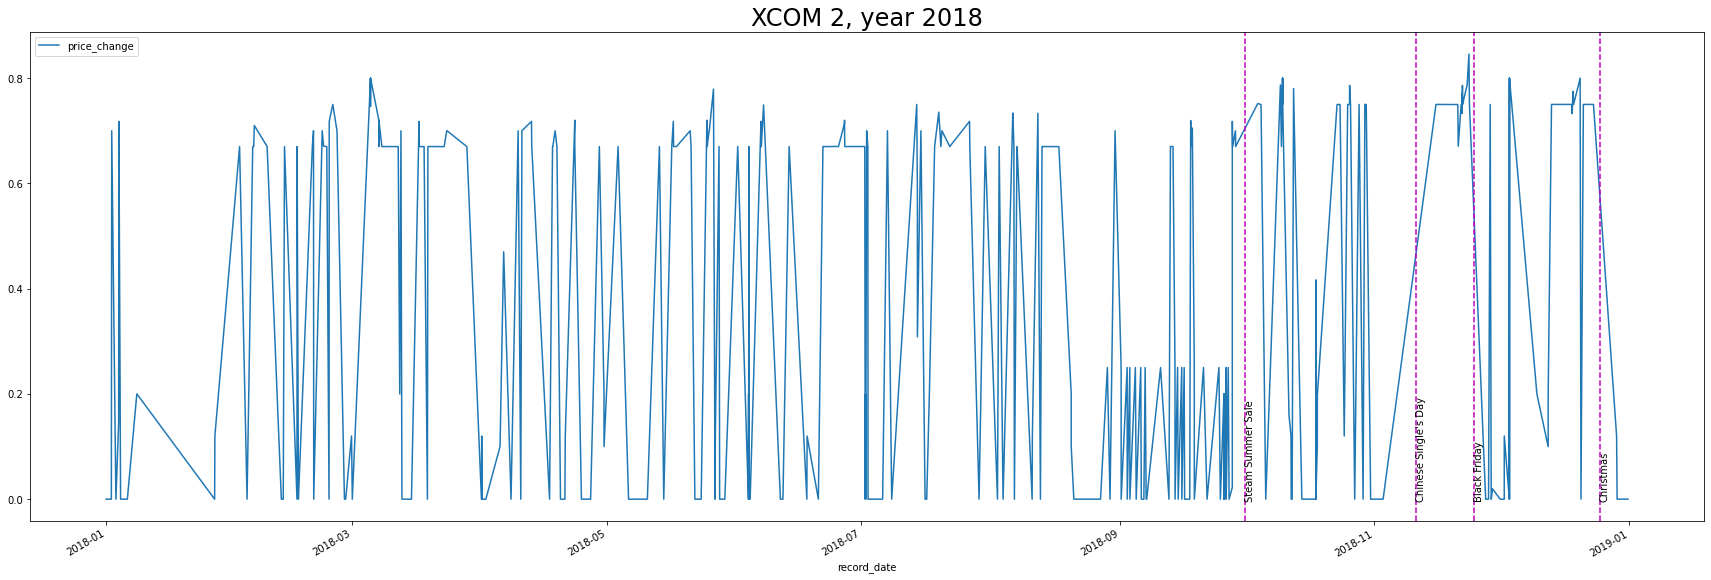

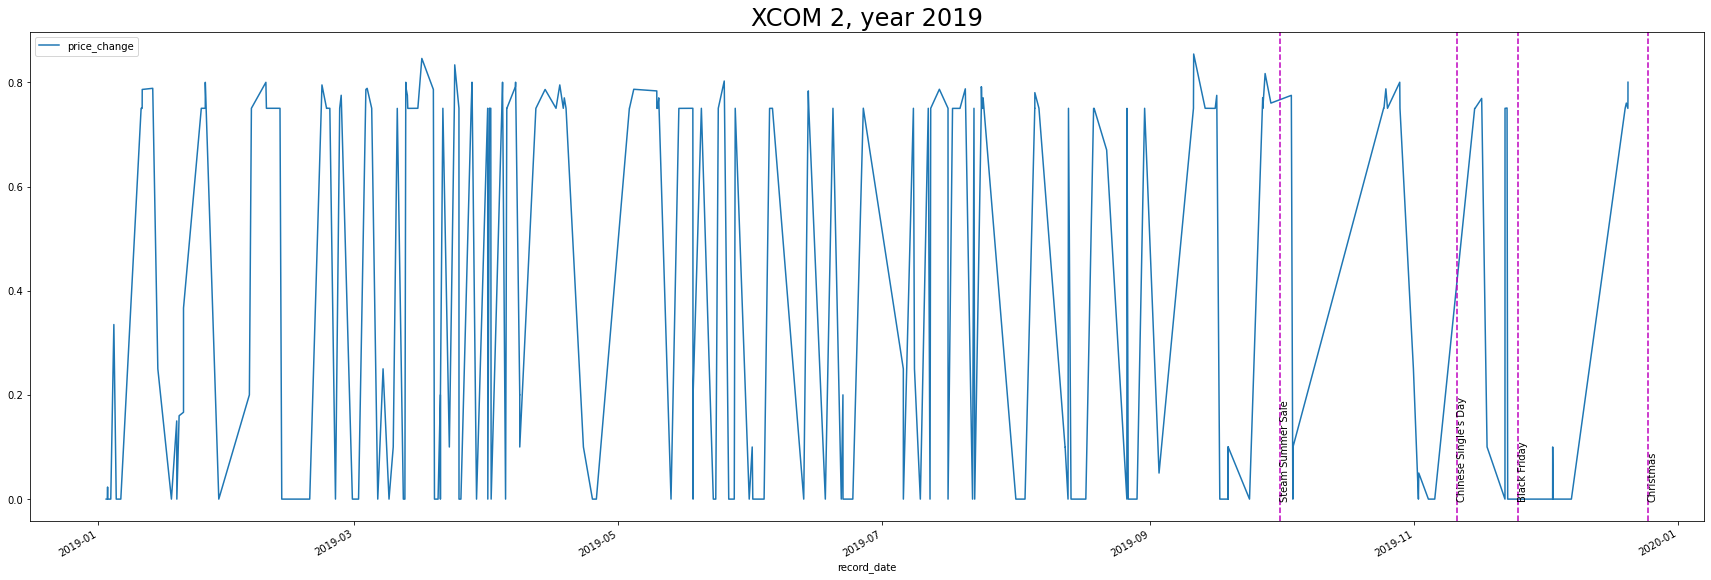

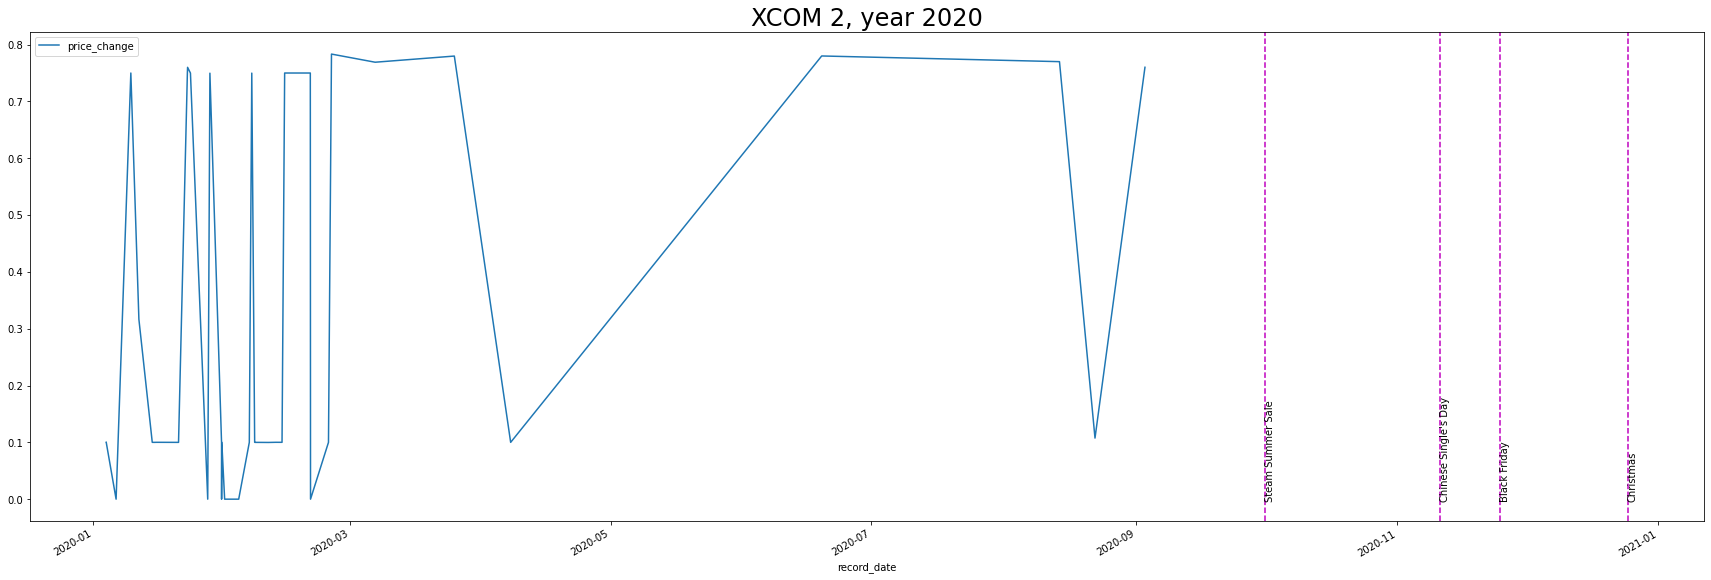

In [688]:
games = get_n_games_row_count(cleaned_games_with_history, 1)
years = list(map(lambda i: i+2017, range(0, 4)))
for (steam_id, game_title, _) in tqdm(games):
    for year in years:
        plot_game_price_history(cleaned_games_with_history, steam_id, game_title=game_title, year=year, show_holidays=True)

<a id="5"></a>
<h2>5. Advanced Analysis and Machine Learning</h2>
<a href="#table-of-contents">^back to top^</a>

In [689]:
advanced_analysis_and_ml = load_df('games_with_history.csv')

<a id="5.1"></a>
<h3>5.1. Feature correlation</h3>
<a href="#table-of-contents">^back to top^</a>

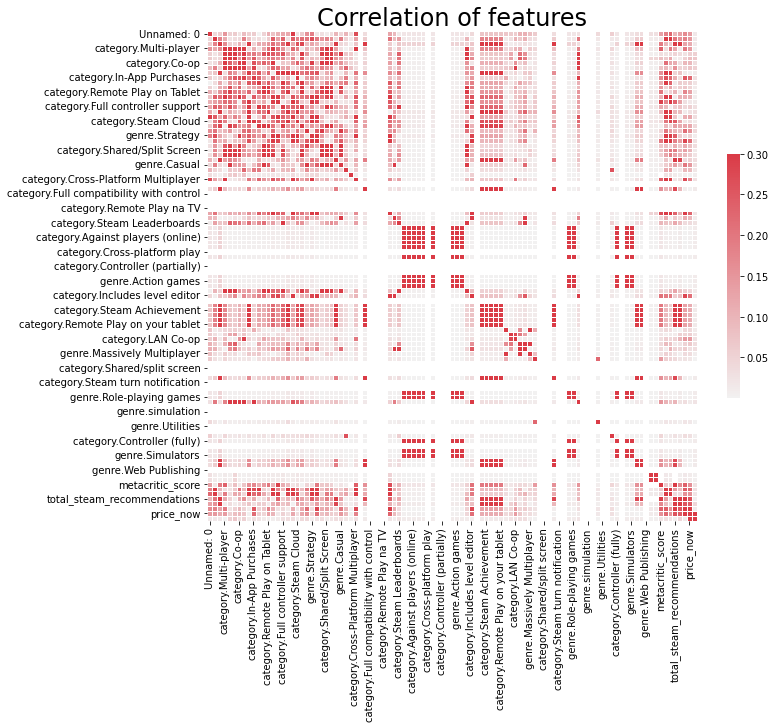

In [690]:
def plot_correlation(ndf: DataFrame):
    df = ndf.copy()
    df = df.loc[:, ~df.columns.str.startswith('supported_language')]
    df = df.loc[:, ~df.columns.str.startswith('publisher')]
    df = df.loc[:, ~df.columns.str.startswith('developer')]
    df.drop(['title', 'windows_supported', 'history_link', 'steamId', 'is_free', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)
    corr = df.corr().abs()

    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.2)] # dont remove all
    df.drop(to_drop, axis=1, inplace=True)

    mask = np.zeros_like(corr,dtype=bool)
    pyplot.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, vmax=.3, mask=mask, center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})
    pyplot.title('Correlation of features')

plot_correlation(advanced_analysis_and_ml)

<a id="5.2"></a>
<h3>5.2. Linear Regression Model</h3>
<a href="#table-of-contents">^back to top^</a>

In [691]:
def load_dataset(ndf: DataFrame, target_column):
    df = ndf.copy()
    df.drop(['title', 'windows_supported', 'history_link', 'steamId', 'is_free', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)
    df['controller_support'] = df['controller_support'].apply(lambda row: True if row == 'full' else False)
    df['required_age'] = df['required_age'].astype("category")

    avg_metacritic_score = df['metacritic_score'].mean()
    df['metacritic_score'].fillna(avg_metacritic_score, inplace=True)

    df['total_steam_recommendations'].fillna(0, inplace=True)
    categorical_data = df.select_dtypes(['category'])

    for category_col in categorical_data:
        df.append(pd.get_dummies(data=df[category_col], drop_first=True))
        df.drop(category_col, axis=1, inplace=True)

    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_date'] = df['release_date'].map(datetime.datetime.toordinal)

    if df['metacritic_score'].iloc[0] is None or np.isnan(df['metacritic_score'].iloc[0]):
        df.drop(['metacritic_score'], axis=1, inplace=True)

    df['record_date'] = pd.to_datetime(df['record_date'])
    df['record_date'] = df['record_date'].map(datetime.datetime.toordinal)

    df.drop(['fullgame', 'shop'], axis=1, inplace=True)

    Y = df.pop(target_column)
    return df, Y

In [692]:
def train_linear_regression_model(X_train, y_train):
    model = linear_model.LinearRegression()
    return model.fit(X_train, y_train)

def create_price_change_model(ndf) -> dict:
    X, y = load_dataset(ndf, 'price_change')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    return {'model': train_linear_regression_model(X_train=X_train, y_train=y_train), 'X_test': X_test, 'y_test': y_test}

def predict_evaluate_performance(model, X_test, y_test):
    predicted = model.predict(X_test)
    return {'predicted': predicted, 'score': r2_score(y_test, predicted)}


In [693]:
price_change_predictions = dict()
price_change_predictions['as_is'] = create_price_change_model(advanced_analysis_and_ml)
for game in tqdm(advanced_analysis_and_ml.steamId.unique(), total=len(advanced_analysis_and_ml.steamId.unique())):
    price_change_predictions[game] = create_price_change_model(advanced_analysis_and_ml[advanced_analysis_and_ml.steamId==game])

ValueError: could not convert string to float: 'Hangar 13'

In [ ]:
price_change_predictions['as_is']['performance'] = predict_evaluate_performance(**price_change_predictions['as_is'])

for game in tqdm(advanced_analysis_and_ml.steamId.unique()):
    price_change_predictions[game]['performance'] = predict_evaluate_performance(**price_change_predictions[game])

In [ ]:
print(list(map(lambda x: (x[0], x[1]['performance']['score']), price_change_predictions.items())))

# Time Series Arema Model

<a id="external_resources"></a>
<h2>External Resources Used</h2>
<a href="#table-of-contents">^back to top^</a>

* Scraped Sites
	* <a href="https://isthereanydeal.com/game/reddeadredemptionii/info/"><b>Is-There-Any-Deal website - For scraping cost history and more financial details</b></a>
	* <a href="https://store.steampowered.com/api/appdetails"><b>Steam API for Game Metadata - https://store.steampowered.com/api/appdetails?appids=1091500M</b></a>
	* <a href="https://steamcharts.com"><b>steamcharts.com - Site that tracked the amount of players over time of a game, used a request url i got from devtools network (because html just shows the response of the request)</b></a>
* General
    * <a href="https://pandas.pydata.org/docs/index.html"><b>Pandas Documentation</b></a>
    * <a href="https://seaborn.pydata.org"><b>Seaborn Documentation</b></a>
    * <a href="https://scikit-learn.org/stable/modules/classes.html"><b>Scikitlearn API</b></a>
    * <a href="http://jsonviewer.stack.hu/"><b>Viewing response json</b></a>
    * <a href="https://seaborn.pydata.org/">Seaborn API</a>
    * <a href="https://matplotlib.org/stable/">Matplotlib documentation</a>
    * <a href="https://github.com/tqdm/tqdm">TQDM - loader for jupyter notebook</a>
    * <a href="https://selenium-python.readthedocs.io/">Selenium Documentation</a>
* Scraping
	* <a href="https://www.geeksforgeeks.org/web-scraping-without-getting-blocked/"><b>Using Proxies to avoiding getting blocked</b></a>
	* <a href="https://wiki.teamfortress.com/wiki/User:RJackson/StorefrontAPI#App_info"><b>Steam StoreFront API</b> Limited to 100,000 requests per day, and no more than 10 per second</a>
	* <a href="https://www.programiz.com/python-programming/json">Using json serialization and parsing</a>
	* <a href="https://www.geeksforgeeks.org/callable-in-python/">Check if object is callable</a>
* EDA
    * <a href="https://www.laurivan.com/convert-timestamp-to-datetime-for-pandas-dataframe/">Convert timestamp to datetime</a>
* Advanced Analysis
* Stack Overflow
    * <a href="https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value">Sort dictionary by value</a>
    * <a href="https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib">Set Figure size</a>
    * <a href="https://stackoverflow.com/questions/43822349/drop-column-that-starts-with/43822392">Drop column that starts with</a>
    * <a href="https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on">Drop all columns which are 95% correlated</a>
    * <a href="https://stackoverflow.com/questions/12141150/from-list-of-integers-get-number-closest-to-a-given-value">From list of integers, get number closest to a given value</a>
    * <a href="https://stackoverflow.com/questions/5268404/what-is-the-fastest-way-to-check-if-a-class-has-a-function-defined">Check if function is defined</a>
    * <a href="https://stackoverflow.com/questions/3694487/in-python-how-do-you-convert-seconds-since-epoch-to-a-datetime-object">In Python, how do you convert seconds since epoch to a `datetime` object?</a>
    * <a href="https://stackoverflow.com/questions/37494983/python-fromtimestamp-oserror">Python fromtimestamp OSError</a>
    * <a href="https://stackoverflow.com/questions/41985993/tqdm-show-progress-for-a-generator-i-know-the-length-of">tqdm show progress for a generator I know the length of</a>
    * <a href="https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown">How to reference a IPython notebook cell in markdown?</a>
    * <a href="https://stackoverflow.com/questions/7263824/get-html-source-of-webelement-in-selenium-webdriver-using-python">Get HTML source of WebElement in Selenium WebDriver using Python</a>
    * <a href="https://stackoverflow.com/questions/45576958/scrolling-to-top-of-the-page-in-python-using-selenium">Scrolling to top of the page in Python using Selenium</a>